In [13]:
 import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
dataframe=pd.read_csv("Housing.csv")

In [5]:
dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [150]:
y = dataframe.iloc[:, 0]  # First column (target variable)
x = dataframe.iloc[:,1:5]  # All other columns (features)


In [151]:
print(x)

     area  bedrooms  bathrooms  stories
0    7420         4          2        3
1    8960         4          4        4
2    9960         3          2        2
3    7500         4          2        2
4    7420         4          1        2
..    ...       ...        ...      ...
540  3000         2          1        1
541  2400         3          1        1
542  3620         2          1        1
543  2910         3          1        1
544  3850         3          1        2

[545 rows x 4 columns]


In [152]:
##enccoding categorical data
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')

In [125]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [153]:
X=np.array(ct.fit_transform(x))

In [149]:
X

array([[0.0, 0.0, 1.0, ..., 2, 'yes', 'furnished'],
       [0.0, 0.0, 0.0, ..., 3, 'no', 'furnished'],
       [0.0, 1.0, 0.0, ..., 2, 'yes', 'semi-furnished'],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 'no', 'unfurnished'],
       [1.0, 0.0, 0.0, ..., 0, 'no', 'furnished'],
       [0.0, 1.0, 0.0, ..., 0, 'no', 'unfurnished']], dtype=object)

In [154]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


x_train shape: (436, 4), x_test shape: (109, 4)
y_train shape: (436,), y_test shape: (109,)


In [155]:
reg.fit(x_train,y_train)

LinearRegression()

In [156]:
y_pred=reg.predict(x_test)

In [157]:
y_pred

array([ 4080369.90638061,  5761744.25797161,  4130644.9122594 ,
        6899050.51089143,  4208775.258233  ,  6774327.7477927 ,
        3507683.77663345,  3877231.00684927,  3114416.55193059,
        8584870.14221726,  7412914.95261337,  4064743.83718589,
        3865511.45495323,  4371024.09964166,  4341725.21990156,
        2952958.32022095,  4170729.52325428,  4355398.03044694,
        3728783.34949944,  3500380.46104014,  6449324.12102112,
        5785216.18024558,  4471021.63624857,  3181870.92768429,
        5539835.46292804,  4496065.4716813 ,  4738236.72571754,
        4736664.81255879,  6330589.50738387,  4511658.72239412,
        3461315.28805334,  3920584.04262533,  5799237.51779965,
        3320680.66530087,  3736596.3840968 ,  4258244.81698399,
        5122900.30612403,  3703781.63878789,  2828969.20467127,
        3367430.49937157,  8128317.33727578,  6345673.03909265,
        7073557.66663228,  4150305.87226626,  3378768.70577703,
        6637599.64233891,  3628785.81289

In [158]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

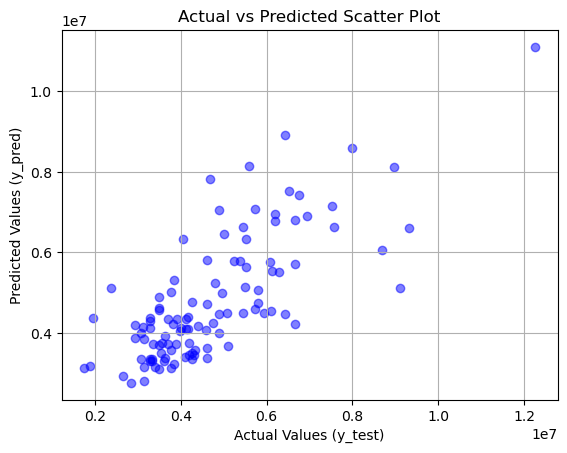

In [165]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Scatter Plot")
plt.grid(True)
plt.show()


In [167]:
print(np.set_printoptions(precision=2))

None


In [170]:
print(np.concatenate([y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)],1))

AttributeError: 'Series' object has no attribute 'reshape'

In [173]:
import numpy as np

y_pred_array = np.array(y_pred).reshape(-1, 1)  
y_test_array = np.array(y_test).reshape(-1, 1)

print(np.concatenate([y_pred_array, y_test_array], axis=1))


[[ 4080369.91  4585000.  ]
 [ 5761744.26  6083000.  ]
 [ 4130644.91  4007500.  ]
 [ 6899050.51  6930000.  ]
 [ 4208775.26  2940000.  ]
 [ 6774327.75  6195000.  ]
 [ 3507683.78  3535000.  ]
 [ 3877231.01  2940000.  ]
 [ 3114416.55  3500000.  ]
 [ 8584870.14  7980000.  ]
 [ 7412914.95  6755000.  ]
 [ 4064743.84  3990000.  ]
 [ 3865511.45  3150000.  ]
 [ 4371024.1   3290000.  ]
 [ 4341725.22  4130000.  ]
 [ 2952958.32  2660000.  ]
 [ 4170729.52  4410000.  ]
 [ 4355398.03  3710000.  ]
 [ 3728783.35  3360000.  ]
 [ 3500380.46  4270000.  ]
 [ 6449324.12  5005000.  ]
 [ 5785216.18  5383000.  ]
 [ 4471021.64  6440000.  ]
 [ 3181870.93  1890000.  ]
 [ 5539835.46  6125000.  ]
 [ 4496065.47  5460000.  ]
 [ 4738236.73  5803000.  ]
 [ 4736664.81  4620000.  ]
 [ 6330589.51  5530000.  ]
 [ 4511658.72  5950000.  ]
 [ 3461315.29  4305000.  ]
 [ 3920584.04  3640000.  ]
 [ 5799237.52  5250000.  ]
 [ 3320680.67  3325000.  ]
 [ 3736596.38  3703000.  ]
 [ 4258244.82  4753000.  ]
 [ 5122900.31  9100000.  ]
 